# **Modelling and Evaluation Notebook**

## Objectives
TODO 
* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* inputs/cherry-leaves-dataset/cherry-leaves/train
* inputs/cherry-leaves-dataset/cherry-leaves/test
* inputs/cherry-leaves-dataset/cherry-leaves/validation
* image shape embeddings pickle file

## Outputs
TODO
* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments
TODO
* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

### Import regular packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/cherry-ML/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/cherry-ML'

### Set input directory

In [6]:
my_data_dir = 'inputs/cherry-leaves-dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [8]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Gather labels

In [9]:
labels = os.listdir(train_path)

print(f"Project Labels: {labels}")

Project Labels: ['healthy', 'powdery_mildew']


### Load image shape embeddings

In [10]:
## Import saved image shape embedding pickle file
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

***

# Review class distribution

* across whole dataset
* per train, test, and validation

* train- healthy: 1472 images

* train- powdery_mildew: 1472 images

* validation- healthy: 210 images

* validation- powdery_mildew: 210 images

* test- healthy: 422 images

* test- powdery_mildew: 422 images



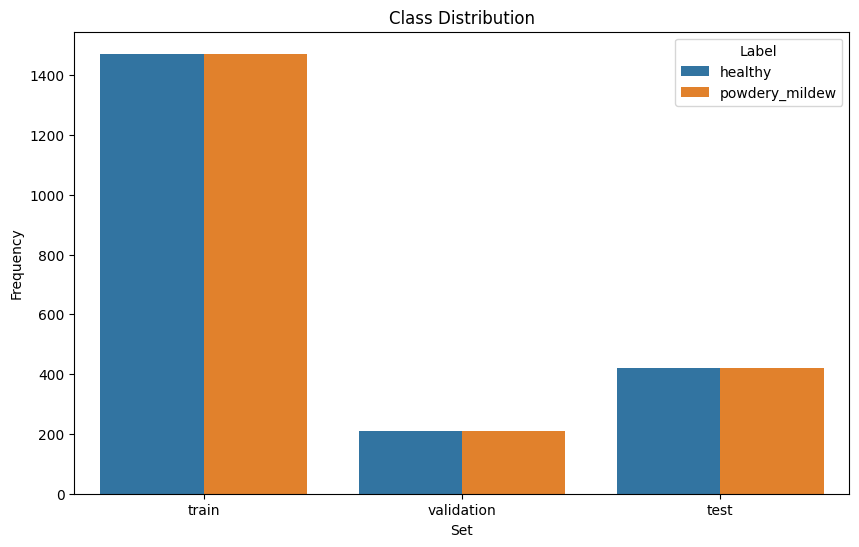

In [19]:
df_freq = pd.DataFrame([])
# gather info
for folder in ['train', 'validation', 'test']:
    for label in labels:
        path = my_data_dir + '/' + folder + '/' + label
        df_freq = df_freq.append(pd.Series(
            {'Set': folder,
             'Label': label,
             'Frequency': int(len(os.listdir(path)))},
            ), ignore_index=True)  # can specify later TODO?
        print(f"* {folder}- {label}: {len(os.listdir(path))} images\n")


### plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Set', y='Frequency', hue='Label', data=df_freq)
plt.title('Class Distribution')
plt.savefig(f'{file_path}/class_distribution.png', bbox_inches='tight', dpi=600)
plt.show()

***

# Image Augmentation

### Define image data generator, initialize


In [50]:
# This function generates batches of image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize
# TODO after testing, check effect, change or add params if wanted:
# TODO https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?hl=en
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,  # zoom by 10%
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255  # between 0 and 500 pixels large
                                          )

### Augment TRAINING image dataset


In [51]:
batch_size = 20  # TODO Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Aubment VALIDATION image dataset


In [52]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment TEST image dataset

In [53]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented training image

(20, 256, 256, 3)

--------------


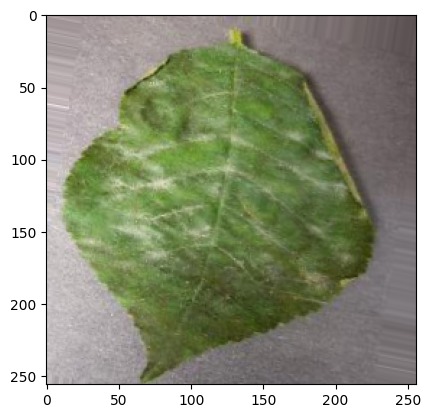

(20, 256, 256, 3)

--------------


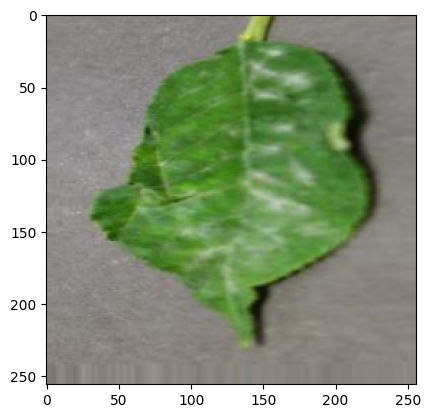

(20, 256, 256, 3)

--------------


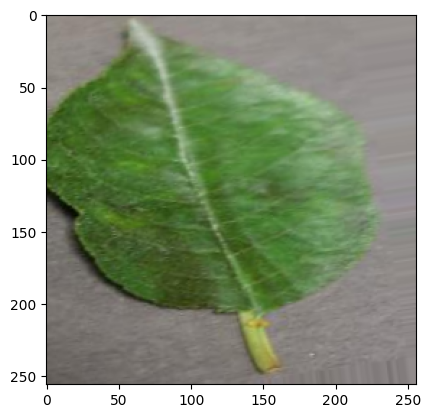

In [58]:
for _ in range(3):
    img, label = train_set.next()
    print(f'{img.shape}\n')
    plt.imshow(img[0])
    print('--------------')
    plt.show()

    # expect: batch, width, height, RGB

### Plot augmented validation and test images

(20, 256, 256, 3)

--------------


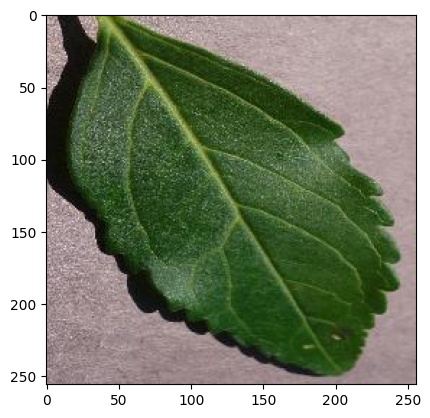

(20, 256, 256, 3)

--------------


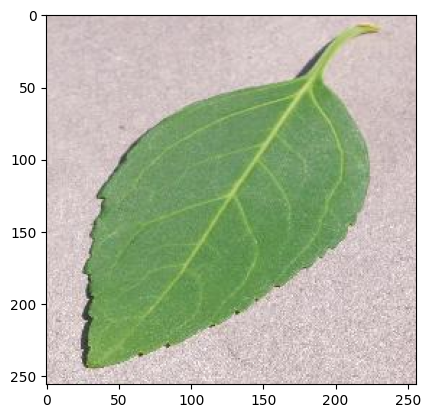

(20, 256, 256, 3)

--------------


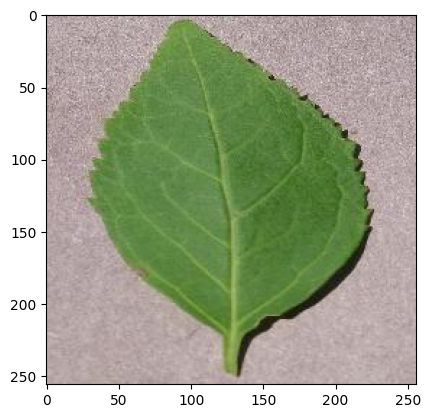

In [57]:
for _ in range(3):  # test augmentation has worked
    img, label = validation_set.next()
    print(f'{img.shape}\n')
    plt.imshow(img[0])
    print('--------------')
    plt.show()

    # expect: batch num, width, height, RGB

###  Observations
Augmented validation and test images have been standardized between 0 to 255 pixels. As you can see, the images are ugmented and are ready to be used for developing and training a CNN model.

### Save class indices

---

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [55]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)


IndentationError: expected an indented block (1114530593.py, line 5)